## Классификация наборов данных с применением логистической регрессии

In [188]:
# !pip install numpy
# !pip install matplotlib
# !pip install sklearn

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

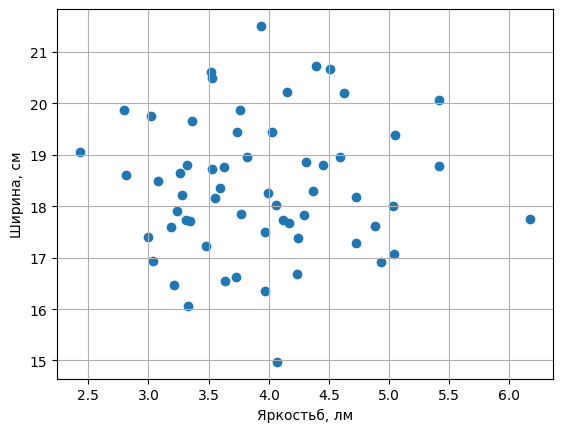

In [190]:
LIGHT_AVG = 4
LIGHT_DISTORTION = 2
x_light = (LIGHT_DISTORTION / 3) * np.random.randn(60) + LIGHT_AVG

WIDTH_AVG = 18
WIDTH_DISTORION = 4
y_width = (WIDTH_DISTORION / 3) * np.random.randn(60) + WIDTH_AVG

plt.scatter(x_light, y_width)
plt.xlabel('Яркостьб, лм')
plt.ylabel('Ширина, см')
plt.grid()
plt.show()

In [191]:
salmon = np.stack((x_light, y_width), axis=-1)

X_OFFSET = 3
Y_OFFSET = 0
seabass = salmon + np.array([X_OFFSET, Y_OFFSET])

(60, 2) (60, 2)


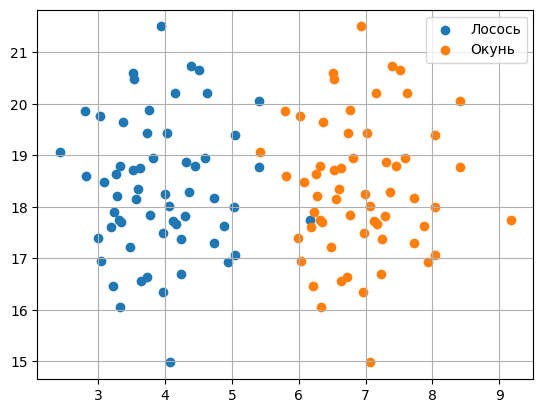

In [192]:
print(salmon.shape, seabass.shape)

plt.scatter(salmon[:, 0], salmon[:, 1])
plt.scatter(seabass[:, 0], seabass[:, 1])

legends = ['Лосось', 'Окунь']
plt.legend(legends)
plt.grid()
plt.show()

In [193]:
XY = np.vstack([salmon, seabass])

annotation1 = [0] * 60
annotation2 = [1] * 60
annotations = annotation1 + annotation2

data, ident = shuffle(XY, annotations)

In [194]:
TEST_SIZE = int(len(data) * 0.4)

x_train = data[:TEST_SIZE]
x_test = data[TEST_SIZE:]

y_train = ident[:TEST_SIZE]
y_test = ident[TEST_SIZE:]

In [195]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

x_lim = np.arange(x_min, x_max, .01)
y_lim = np.arange(y_min, y_max, .01)

xx, yy = np.meshgrid(x_lim, y_lim)

In [196]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Точность: 0.958


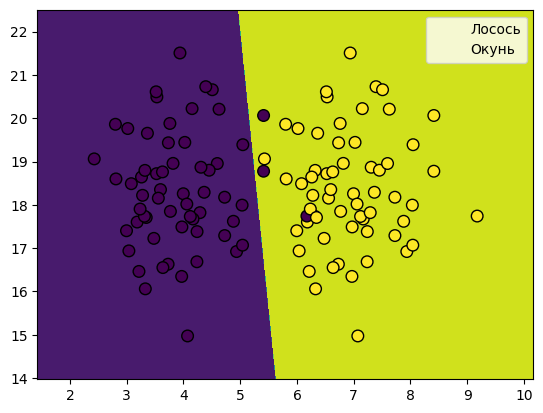

In [197]:
plt.contourf(xx, yy, Z)
scatter = plt.scatter(data[:, 0], data[:, 1], c=ident, edgecolors="black", s=70)
handles = scatter.legend_elements()[0]
legends = ['Лосось', 'Окунь']
plt.legend(legends)

result = clf.predict(x_test)
print('Точность: {0:.3f}'.format(accuracy_score(y_test, result)))

plt.show()